In [1]:
import numpy as np
import scipy.special as sp
import h5py
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from seaborn import kdeplot
from sklearn.neighbors import KernelDensity
plt.rc('font', size=12.0)

In [ ]:
data = h5py.File('nl_hmc_out', 'r')['markov_chain_0']['data']
log_wgt = np.array(data['log_wgt'])
prob_gw17 = np.array(data['prob_gw17'])
prob_gw19 = np.array(data['prob_gw19'])
log_wgt_pop = np.array(data['log_wgt_pop'])
log_wgt_6304 = np.array(data['log_wgt_6304'])
log_wgt_6397 = np.array(data['log_wgt_6397'])
log_wgt_M13 = np.array(data['log_wgt_M13'])
log_wgt_M28 = np.array(data['log_wgt_M28'])
log_wgt_M30 = np.array(data['log_wgt_M30'])
log_wgt_wCen = np.array(data['log_wgt_wCen'])
log_wgt_X7 = np.array(data['log_wgt_X7'])
log_wgt_1810b = np.array(data['log_wgt_1810b'])
log_wgt_1724b = np.array(data['log_wgt_1724b'])
log_wgt_1702 = np.array(data['log_wgt_1702'])
log_wgt_0030 = np.array(data['log_wgt_0030'])
log_wgt_0740 = np.array(data['log_wgt_0740'])
Rns_6304 = np.array(data['Rns_6304'])
Rns_6397 = np.array(data['Rns_6397'])
Rns_M13 = np.array(data['Rns_M13'])
Rns_M28 = np.array(data['Rns_M28'])
Rns_M30 = np.array(data['Rns_M30'])
Rns_wCen = np.array(data['Rns_wCen'])
Rns_X7 = np.array(data['Rns_X7'])
Rns_1810b = np.array(data['Rns_1810b'])
Rns_1724b = np.array(data['Rns_1724b'])
Rns_1702 = np.array(data['Rns_1702'])
Rns_0030 = np.array(data['Rns_0030'])
Rns_0740 = np.array(data['Rns_0740'])
mean_NS = np.array(data['mean_NS'])
mean_WD = np.array(data['mean_WD'])
mean_LM = np.array(data['mean_LMS'])
width_NS = 10**np.array(data['log10_width_NS'])
width_WD = 10**np.array(data['log10_width_WD'])
width_LM = 10**np.array(data['log10_width_LMS'])
skew_NS = np.array(data['skewness_NS'])
skew_WD = np.array(data['skewness_WD'])
skew_LM = np.array(data['skewness_LMS'])
M_max = np.array(data['M_max'])
mf_6304 = np.array(data['mf_6304'])
mf_6397 = np.array(data['mf_6397'])
mf_M13 = np.array(data['mf_M13'])
mf_M28 = np.array(data['mf_M28'])
mf_M30 = np.array(data['mf_M30'])
mf_wCen = np.array(data['mf_wCen'])
mf_X7 = np.array(data['mf_X7'])
mf_1810b = np.array(data['mf_1810b'])
mf_1724b = np.array(data['mf_1724b'])
mf_1702 = np.array(data['mf_1702'])
mf_0030 = np.array(data['mf_0030'])
mf_0740 = np.array(data['mf_0740'])
m1_gw17 = np.array(data['m1_gw17'])
m2_gw17 = np.array(data['m2_gw17'])
m1_gw19 = np.array(data['m1_gw19'])
m2_gw19 = np.array(data['m2_gw19'])

def f_sn(mean, width, skew, mass):
  cf = 1.0/width/np.sqrt(2.0*np.pi)
  exf = np.exp(-0.5*((mass-mean)/width)**2)
  erf = sp.erf((mass-mean)*skew/width/np.sqrt(2.0))
  return cf*exf*(1.0+erf)

fsn_gw19 = f_sn(mean_NS, width_NS, skew_NS, m1_gw19) \
          *f_sn(mean_NS, width_NS, skew_NS, m2_gw19)
fsn_gw17 = f_sn(mean_NS, width_NS, skew_NS, m1_gw17) \
          *f_sn(mean_NS, width_NS, skew_NS, m2_gw17)
fsn_em = f_sn(mean_LM, width_LM, skew_LM, M_max*mf_6304) \
        *f_sn(mean_LM, width_LM, skew_LM, M_max*mf_6397) \
        *f_sn(mean_LM, width_LM, skew_LM, M_max*mf_M13) \
        *f_sn(mean_LM, width_LM, skew_LM, M_max*mf_M28) \
        *f_sn(mean_LM, width_LM, skew_LM, M_max*mf_M30) \
        *f_sn(mean_LM, width_LM, skew_LM, M_max*mf_wCen) \
        *f_sn(mean_LM, width_LM, skew_LM, M_max*mf_X7) \
        *f_sn(mean_LM, width_LM, skew_LM, M_max*mf_1810b) \
        *f_sn(mean_LM, width_LM, skew_LM, M_max*mf_1724b) \
        *f_sn(mean_LM, width_LM, skew_LM, M_max*mf_1702) \
        *f_sn(mean_LM, width_LM, skew_LM, M_max*mf_0740)
log_wgt_gw17 = np.log(fsn_gw17)+prob_gw17
log_wgt_gw19 = np.log(fsn_gw19)+prob_gw19
log_wgt_em = log_wgt_6304  +log_wgt_6397  +log_wgt_M13  +log_wgt_M28 \
            +log_wgt_M30   +log_wgt_wCen  +log_wgt_X7   +log_wgt_1810b \
            +log_wgt_1724b +log_wgt_1702  +log_wgt_0030 +log_wgt_0740 +np.log(fsn_em)
log_wgt_calc = log_wgt_pop+log_wgt_em+log_wgt_gw17+log_wgt_gw19

In [ ]:
print('log_wgt=', log_wgt, ', log_wgt_calc=', log_wgt_calc, ', error=', (log_wgt-log_wgt_calc)*100.0/log_wgt, '%')

In [ ]:
log_wgt_53 = log_wgt
log_fsn_em_53 = np.log(fsn_em)
log_wgt_pop_53 = log_wgt_pop
log_wgt_6304_53 = log_wgt_6304
log_wgt_6397_53 = log_wgt_6397
log_wgt_M13_53 = log_wgt_M13
log_wgt_M28_53 = log_wgt_M28
log_wgt_M30_53 = log_wgt_M30
log_wgt_wCen_53 = log_wgt_wCen
log_wgt_X7_53 = log_wgt_X7
log_wgt_1810b_53 = log_wgt_1810b
log_wgt_1724b_53 = log_wgt_1724b
log_wgt_1702_53 = log_wgt_1702
log_wgt_0030_53 = log_wgt_0030
log_wgt_0740_53 = log_wgt_0740
log_wgt_gw17_53 = log_wgt_gw17
log_wgt_gw19_53 = log_wgt_gw19
log_wgt_em_53 = log_wgt_em
Rns_6304_53 = Rns_6304
Rns_6397_53 = Rns_6397
Rns_M13_53 = Rns_M13
Rns_M28_53 = Rns_M28
Rns_M30_53 = Rns_M30
Rns_wCen_53 = Rns_wCen
Rns_X7_53 = Rns_X7
Rns_1810b_53 = Rns_1810b
Rns_1724b_53 = Rns_1724b
Rns_1702_53 = Rns_1702
Rns_0030_53 = Rns_0030
Rns_0740_53 = Rns_0740

In [ ]:
log_wgt_rw = log_wgt
log_fsn_em_rw = np.log(fsn_em)
log_wgt_pop_rw = log_wgt_pop
log_wgt_6304_rw = log_wgt_6304
log_wgt_6397_rw = log_wgt_6397
log_wgt_M13_rw = log_wgt_M13
log_wgt_M28_rw = log_wgt_M28
log_wgt_M30_rw = log_wgt_M30
log_wgt_wCen_rw = log_wgt_wCen
log_wgt_X7_rw = log_wgt_X7
log_wgt_1810b_rw = log_wgt_1810b
log_wgt_1724b_rw = log_wgt_1724b
log_wgt_1702_rw = log_wgt_1702
log_wgt_0030_rw = log_wgt_0030
log_wgt_0740_rw = log_wgt_0740
log_wgt_gw17_rw = log_wgt_gw17
log_wgt_gw19_rw = log_wgt_gw19
log_wgt_em_rw = log_wgt_em
Rns_6304_rw = Rns_6304
Rns_6397_rw = Rns_6397
Rns_M13_rw = Rns_M13
Rns_M28_rw = Rns_M28
Rns_M30_rw = Rns_M30
Rns_wCen_rw = Rns_wCen
Rns_X7_rw = Rns_X7
Rns_1810b_rw = Rns_1810b
Rns_1724b_rw = Rns_1724b
Rns_1702_rw = Rns_1702
Rns_0030_rw = Rns_0030
Rns_0740_rw = Rns_0740

In [ ]:
log_wgt_h = log_wgt
log_fsn_em_h = np.log(fsn_em)
log_wgt_pop_h = log_wgt_pop
log_wgt_6304_h = log_wgt_6304
log_wgt_6397_h = log_wgt_6397
log_wgt_M13_h = log_wgt_M13
log_wgt_M28_h = log_wgt_M28
log_wgt_M30_h = log_wgt_M30
log_wgt_wCen_h = log_wgt_wCen
log_wgt_X7_h = log_wgt_X7
log_wgt_1810b_h = log_wgt_1810b
log_wgt_1724b_h = log_wgt_1724b
log_wgt_1702_h = log_wgt_1702
log_wgt_0030_h = log_wgt_0030
log_wgt_0740_h = log_wgt_0740
log_wgt_gw17_h = log_wgt_gw17
log_wgt_gw19_h = log_wgt_gw19
log_wgt_em_h = log_wgt_em
Rns_6304_h = Rns_6304
Rns_6397_h = Rns_6397
Rns_M13_h = Rns_M13
Rns_M28_h = Rns_M28
Rns_M30_h = Rns_M30
Rns_wCen_h = Rns_wCen
Rns_X7_h = Rns_X7
Rns_1810b_h = Rns_1810b
Rns_1724b_h = Rns_1724b
Rns_1702_h = Rns_1702
Rns_0030_h = Rns_0030
Rns_0740_h = Rns_0740

In [ ]:
print(log_wgt_6304_53==log_wgt_6304_rw, 
      log_wgt_6397_53==log_wgt_6397_rw, 
      log_wgt_M13_53==log_wgt_M13_rw, 
      log_wgt_M28_53==log_wgt_M28_rw, 
      log_wgt_M30_53==log_wgt_M30_rw, 
      log_wgt_wCen_53==log_wgt_wCen_rw, 
      log_wgt_X7_53==log_wgt_X7_rw, 
      log_wgt_1810b_53==log_wgt_1810b_rw, 
      log_wgt_1724b_53==log_wgt_1724b_rw, 
      log_wgt_1702_53==log_wgt_1702_rw, 
      log_wgt_0030_53==log_wgt_0030_rw, 
      log_wgt_0740_53==log_wgt_0740_rw)

In [ ]:
print(log_wgt_6304_53==log_wgt_6304_h, 
      log_wgt_6397_53==log_wgt_6397_h, 
      log_wgt_M13_53==log_wgt_M13_h, 
      log_wgt_M28_53==log_wgt_M28_h, 
      log_wgt_M30_53==log_wgt_M30_h, 
      log_wgt_wCen_53==log_wgt_wCen_h, 
      log_wgt_X7_53==log_wgt_X7_h, 
      log_wgt_1810b_53==log_wgt_1810b_h, 
      log_wgt_1724b_53==log_wgt_1724b_h, 
      log_wgt_1702_53==log_wgt_1702_h, 
      log_wgt_0030_53==log_wgt_0030_h, 
      log_wgt_0740_53==log_wgt_0740_h)

In [ ]:
print(log_wgt_6304_h==log_wgt_6304_rw, 
      log_wgt_6397_h==log_wgt_6397_rw, 
      log_wgt_M13_h==log_wgt_M13_rw, 
      log_wgt_M28_h==log_wgt_M28_rw, 
      log_wgt_M30_h==log_wgt_M30_rw, 
      log_wgt_wCen_h==log_wgt_wCen_rw, 
      log_wgt_X7_h==log_wgt_X7_rw, 
      log_wgt_1810b_h==log_wgt_1810b_rw, 
      log_wgt_1724b_h==log_wgt_1724b_rw, 
      log_wgt_1702_h==log_wgt_1702_rw, 
      log_wgt_0030_h==log_wgt_0030_rw, 
      log_wgt_0740_h==log_wgt_0740_rw)

In [ ]:
print((log_wgt_6304_53-log_wgt_6304_h)/log_wgt_6304_53, (log_wgt_M13_53-log_wgt_M13_h)/log_wgt_M13_53, (log_wgt_wCen_53-log_wgt_wCen_h)/log_wgt_wCen_53, (log_wgt_X7_53-log_wgt_X7_h)/log_wgt_X7_53, (log_wgt_1810b_53-log_wgt_1810b_h)/log_wgt_1810b_53, (log_wgt_0740_53-log_wgt_0740_h)/log_wgt_0740_53)

 - 6304
 - M13
 - wCen
 - X7
 - 1810b
 - 0740

In [ ]:
print(Rns_6304_53==Rns_6304_h,
      Rns_6397_53==Rns_6397_h,
      Rns_M13_53==Rns_M13_h,
      Rns_M28_53==Rns_M28_h,
      Rns_M30_53==Rns_M30_h,
      Rns_wCen_53==Rns_wCen_h,
      Rns_X7_53==Rns_X7_h,
      Rns_1810b_53==Rns_1810b_h,
      Rns_1724b_53==Rns_1724b_h,
      Rns_1702_53==Rns_1702_h,
      Rns_0030_53==Rns_0030_h,
      Rns_0740_53==Rns_0740_h)

In [ ]:
print((Rns_6304_53-Rns_6304_h)/Rns_6304_53, (Rns_M13_53-Rns_M13_h)/Rns_M13_53, (Rns_M30_53-Rns_M30_h)/Rns_M30_53, (Rns_wCen_53-Rns_wCen_h)/Rns_wCen_53, (Rns_X7_53-Rns_X7_h)/Rns_X7_53, (Rns_1810b_53-Rns_1810b_h)/Rns_1810b_53, (Rns_0740_53-Rns_0740_h)/Rns_0740_53)

In [2]:
data_hm = h5py.File('nl_hmc_out', 'r')['markov_chain_0']['data']
data_rw = h5py.File('nl_rw_out', 'r')['markov_chain_0']['data']
data_53 = h5py.File('nl_53_init', 'r')['markov_chain_0']['data']

R_0_hm = np.array(data_hm['R_0']); R_0_rw = np.array(data_rw['R_0']); R_0_53 = np.array(data_53['R_0'])
R_1_hm = np.array(data_hm['R_1']); R_1_rw = np.array(data_rw['R_1']); R_1_53 = np.array(data_53['R_1'])
R_2_hm = np.array(data_hm['R_2']); R_2_rw = np.array(data_rw['R_2']); R_2_53 = np.array(data_53['R_2'])
R_3_hm = np.array(data_hm['R_3']); R_3_rw = np.array(data_rw['R_3']); R_3_53 = np.array(data_53['R_3'])
R_4_hm = np.array(data_hm['R_4']); R_4_rw = np.array(data_rw['R_4']); R_4_53 = np.array(data_53['R_4'])
R_5_hm = np.array(data_hm['R_5']); R_5_rw = np.array(data_rw['R_5']); R_5_53 = np.array(data_53['R_5'])
R_6_hm = np.array(data_hm['R_6']); R_6_rw = np.array(data_rw['R_6']); R_6_53 = np.array(data_53['R_6'])
R_7_hm = np.array(data_hm['R_7']); R_7_rw = np.array(data_rw['R_7']); R_7_53 = np.array(data_53['R_7'])
R_8_hm = np.array(data_hm['R_8']); R_8_rw = np.array(data_rw['R_8']); R_8_53 = np.array(data_53['R_8'])
R_9_hm = np.array(data_hm['R_9']); R_9_rw = np.array(data_rw['R_9']); R_9_53 = np.array(data_53['R_9'])
R_10_hm = np.array(data_hm['R_10']); R_10_rw = np.array(data_rw['R_10']); R_10_53 = np.array(data_53['R_10'])
R_11_hm = np.array(data_hm['R_11']); R_11_rw = np.array(data_rw['R_11']); R_11_53 = np.array(data_53['R_11'])
R_12_hm = np.array(data_hm['R_12']); R_12_rw = np.array(data_rw['R_12']); R_12_53 = np.array(data_53['R_12'])
R_13_hm = np.array(data_hm['R_13']); R_13_rw = np.array(data_rw['R_13']); R_13_53 = np.array(data_53['R_13'])
R_14_hm = np.array(data_hm['R_14']); R_14_rw = np.array(data_rw['R_14']); R_14_53 = np.array(data_53['R_14'])
R_15_hm = np.array(data_hm['R_15']); R_15_rw = np.array(data_rw['R_15']); R_15_53 = np.array(data_53['R_15'])
R_16_hm = np.array(data_hm['R_16']); R_16_rw = np.array(data_rw['R_16']); R_16_53 = np.array(data_53['R_16'])
R_17_hm = np.array(data_hm['R_17']); R_17_rw = np.array(data_rw['R_17']); R_17_53 = np.array(data_53['R_17'])
R_18_hm = np.array(data_hm['R_18']); R_18_rw = np.array(data_rw['R_18']); R_18_53 = np.array(data_53['R_18'])
R_19_hm = np.array(data_hm['R_19']); R_19_rw = np.array(data_rw['R_19']); R_19_53 = np.array(data_53['R_19'])
R_20_hm = np.array(data_hm['R_20']); R_20_rw = np.array(data_rw['R_20']); R_20_53 = np.array(data_53['R_20'])
R_21_hm = np.array(data_hm['R_21']); R_21_rw = np.array(data_rw['R_21']); R_21_53 = np.array(data_53['R_21'])
R_22_hm = np.array(data_hm['R_22']); R_22_rw = np.array(data_rw['R_22']); R_22_53 = np.array(data_53['R_22'])
R_23_hm = np.array(data_hm['R_23']); R_23_rw = np.array(data_rw['R_23']); R_23_53 = np.array(data_53['R_23'])
R_24_hm = np.array(data_hm['R_24']); R_24_rw = np.array(data_rw['R_24']); R_24_53 = np.array(data_53['R_24'])
R_25_hm = np.array(data_hm['R_25']); R_25_rw = np.array(data_rw['R_25']); R_25_53 = np.array(data_53['R_25'])
R_26_hm = np.array(data_hm['R_26']); R_26_rw = np.array(data_rw['R_26']); R_26_53 = np.array(data_53['R_26'])
R_27_hm = np.array(data_hm['R_27']); R_27_rw = np.array(data_rw['R_27']); R_27_53 = np.array(data_53['R_27'])
R_28_hm = np.array(data_hm['R_28']); R_28_rw = np.array(data_rw['R_28']); R_28_53 = np.array(data_53['R_28'])
R_29_hm = np.array(data_hm['R_29']); R_29_rw = np.array(data_rw['R_29']); R_29_53 = np.array(data_53['R_29'])
R_30_hm = np.array(data_hm['R_30']); R_30_rw = np.array(data_rw['R_30']); R_30_53 = np.array(data_53['R_30'])
R_31_hm = np.array(data_hm['R_31']); R_31_rw = np.array(data_rw['R_31']); R_31_53 = np.array(data_53['R_31'])
R_32_hm = np.array(data_hm['R_32']); R_32_rw = np.array(data_rw['R_32']); R_32_53 = np.array(data_53['R_32'])
R_33_hm = np.array(data_hm['R_33']); R_33_rw = np.array(data_rw['R_33']); R_33_53 = np.array(data_53['R_33'])
R_34_hm = np.array(data_hm['R_34']); R_34_rw = np.array(data_rw['R_34']); R_34_53 = np.array(data_53['R_34'])
R_35_hm = np.array(data_hm['R_35']); R_35_rw = np.array(data_rw['R_35']); R_35_53 = np.array(data_53['R_35'])
R_36_hm = np.array(data_hm['R_36']); R_36_rw = np.array(data_rw['R_36']); R_36_53 = np.array(data_53['R_36'])
R_37_hm = np.array(data_hm['R_37']); R_37_rw = np.array(data_rw['R_37']); R_37_53 = np.array(data_53['R_37'])
R_38_hm = np.array(data_hm['R_38']); R_38_rw = np.array(data_rw['R_38']); R_38_53 = np.array(data_53['R_38'])
R_39_hm = np.array(data_hm['R_39']); R_39_rw = np.array(data_rw['R_39']); R_39_53 = np.array(data_53['R_39'])
R_40_hm = np.array(data_hm['R_40']); R_40_rw = np.array(data_rw['R_40']); R_40_53 = np.array(data_53['R_40'])
R_41_hm = np.array(data_hm['R_41']); R_41_rw = np.array(data_rw['R_41']); R_41_53 = np.array(data_53['R_41'])
R_42_hm = np.array(data_hm['R_42']); R_42_rw = np.array(data_rw['R_42']); R_42_53 = np.array(data_53['R_42'])
R_43_hm = np.array(data_hm['R_43']); R_43_rw = np.array(data_rw['R_43']); R_43_53 = np.array(data_53['R_43'])
R_44_hm = np.array(data_hm['R_44']); R_44_rw = np.array(data_rw['R_44']); R_44_53 = np.array(data_53['R_44'])
R_45_hm = np.array(data_hm['R_45']); R_45_rw = np.array(data_rw['R_45']); R_45_53 = np.array(data_53['R_45'])
R_46_hm = np.array(data_hm['R_46']); R_46_rw = np.array(data_rw['R_46']); R_46_53 = np.array(data_53['R_46'])
R_47_hm = np.array(data_hm['R_47']); R_47_rw = np.array(data_rw['R_47']); R_47_53 = np.array(data_53['R_47'])
R_48_hm = np.array(data_hm['R_48']); R_48_rw = np.array(data_rw['R_48']); R_48_53 = np.array(data_53['R_48'])
R_49_hm = np.array(data_hm['R_49']); R_49_rw = np.array(data_rw['R_49']); R_49_53 = np.array(data_53['R_49'])
R_50_hm = np.array(data_hm['R_50']); R_50_rw = np.array(data_rw['R_50']); R_50_53 = np.array(data_53['R_50'])
R_51_hm = np.array(data_hm['R_51']); R_51_rw = np.array(data_rw['R_51']); R_51_53 = np.array(data_53['R_51'])
R_52_hm = np.array(data_hm['R_52']); R_52_rw = np.array(data_rw['R_52']); R_52_53 = np.array(data_53['R_52'])
R_53_hm = np.array(data_hm['R_53']); R_53_rw = np.array(data_rw['R_53']); R_53_53 = np.array(data_53['R_53'])
R_54_hm = np.array(data_hm['R_54']); R_54_rw = np.array(data_rw['R_54']); R_54_53 = np.array(data_53['R_54'])
R_55_hm = np.array(data_hm['R_55']); R_55_rw = np.array(data_rw['R_55']); R_55_53 = np.array(data_53['R_55'])
R_56_hm = np.array(data_hm['R_56']); R_56_rw = np.array(data_rw['R_56']); R_56_53 = np.array(data_53['R_56'])
R_57_hm = np.array(data_hm['R_57']); R_57_rw = np.array(data_rw['R_57']); R_57_53 = np.array(data_53['R_57'])
R_58_hm = np.array(data_hm['R_58']); R_58_rw = np.array(data_rw['R_58']); R_58_53 = np.array(data_53['R_58'])
R_59_hm = np.array(data_hm['R_59']); R_59_rw = np.array(data_rw['R_59']); R_59_53 = np.array(data_53['R_59'])
R_60_hm = np.array(data_hm['R_60']); R_60_rw = np.array(data_rw['R_60']); R_60_53 = np.array(data_53['R_60'])
R_61_hm = np.array(data_hm['R_61']); R_61_rw = np.array(data_rw['R_61']); R_61_53 = np.array(data_53['R_61'])
R_62_hm = np.array(data_hm['R_62']); R_62_rw = np.array(data_rw['R_62']); R_62_53 = np.array(data_53['R_62'])
R_63_hm = np.array(data_hm['R_63']); R_63_rw = np.array(data_rw['R_63']); R_63_53 = np.array(data_53['R_63'])
R_64_hm = np.array(data_hm['R_64']); R_64_rw = np.array(data_rw['R_64']); R_64_53 = np.array(data_53['R_64'])
R_65_hm = np.array(data_hm['R_65']); R_65_rw = np.array(data_rw['R_65']); R_65_53 = np.array(data_53['R_65'])
R_66_hm = np.array(data_hm['R_66']); R_66_rw = np.array(data_rw['R_66']); R_66_53 = np.array(data_53['R_66'])
R_67_hm = np.array(data_hm['R_67']); R_67_rw = np.array(data_rw['R_67']); R_67_53 = np.array(data_53['R_67'])
R_68_hm = np.array(data_hm['R_68']); R_68_rw = np.array(data_rw['R_68']); R_68_53 = np.array(data_53['R_68'])
R_69_hm = np.array(data_hm['R_69']); R_69_rw = np.array(data_rw['R_69']); R_69_53 = np.array(data_53['R_69'])
R_70_hm = np.array(data_hm['R_70']); R_70_rw = np.array(data_rw['R_70']); R_70_53 = np.array(data_53['R_70'])
R_71_hm = np.array(data_hm['R_71']); R_71_rw = np.array(data_rw['R_71']); R_71_53 = np.array(data_53['R_71'])
R_72_hm = np.array(data_hm['R_72']); R_72_rw = np.array(data_rw['R_72']); R_72_53 = np.array(data_53['R_72'])
R_73_hm = np.array(data_hm['R_73']); R_73_rw = np.array(data_rw['R_73']); R_73_53 = np.array(data_53['R_73'])
R_74_hm = np.array(data_hm['R_74']); R_74_rw = np.array(data_rw['R_74']); R_74_53 = np.array(data_53['R_74'])
R_75_hm = np.array(data_hm['R_75']); R_75_rw = np.array(data_rw['R_75']); R_75_53 = np.array(data_53['R_75'])
R_76_hm = np.array(data_hm['R_76']); R_76_rw = np.array(data_rw['R_76']); R_76_53 = np.array(data_53['R_76'])
R_77_hm = np.array(data_hm['R_77']); R_77_rw = np.array(data_rw['R_77']); R_77_53 = np.array(data_53['R_77'])
R_78_hm = np.array(data_hm['R_78']); R_78_rw = np.array(data_rw['R_78']); R_78_53 = np.array(data_53['R_78'])
R_79_hm = np.array(data_hm['R_79']); R_79_rw = np.array(data_rw['R_79']); R_79_53 = np.array(data_53['R_79'])
R_80_hm = np.array(data_hm['R_80']); R_80_rw = np.array(data_rw['R_80']); R_80_53 = np.array(data_53['R_80'])
R_81_hm = np.array(data_hm['R_81']); R_81_rw = np.array(data_rw['R_81']); R_81_53 = np.array(data_53['R_81'])
R_82_hm = np.array(data_hm['R_82']); R_82_rw = np.array(data_rw['R_82']); R_82_53 = np.array(data_53['R_82'])
R_83_hm = np.array(data_hm['R_83']); R_83_rw = np.array(data_rw['R_83']); R_83_53 = np.array(data_53['R_83'])
R_84_hm = np.array(data_hm['R_84']); R_84_rw = np.array(data_rw['R_84']); R_84_53 = np.array(data_53['R_84'])
R_85_hm = np.array(data_hm['R_85']); R_85_rw = np.array(data_rw['R_85']); R_85_53 = np.array(data_53['R_85'])
R_86_hm = np.array(data_hm['R_86']); R_86_rw = np.array(data_rw['R_86']); R_86_53 = np.array(data_53['R_86'])
R_87_hm = np.array(data_hm['R_87']); R_87_rw = np.array(data_rw['R_87']); R_87_53 = np.array(data_53['R_87'])
R_88_hm = np.array(data_hm['R_88']); R_88_rw = np.array(data_rw['R_88']); R_88_53 = np.array(data_53['R_88'])
R_89_hm = np.array(data_hm['R_89']); R_89_rw = np.array(data_rw['R_89']); R_89_53 = np.array(data_53['R_89'])
R_90_hm = np.array(data_hm['R_90']); R_90_rw = np.array(data_rw['R_90']); R_90_53 = np.array(data_53['R_90'])
R_91_hm = np.array(data_hm['R_91']); R_91_rw = np.array(data_rw['R_91']); R_91_53 = np.array(data_53['R_91'])
R_92_hm = np.array(data_hm['R_92']); R_92_rw = np.array(data_rw['R_92']); R_92_53 = np.array(data_53['R_92'])
R_93_hm = np.array(data_hm['R_93']); R_93_rw = np.array(data_rw['R_93']); R_93_53 = np.array(data_53['R_93'])
R_94_hm = np.array(data_hm['R_94']); R_94_rw = np.array(data_rw['R_94']); R_94_53 = np.array(data_53['R_94'])
R_95_hm = np.array(data_hm['R_95']); R_95_rw = np.array(data_rw['R_95']); R_95_53 = np.array(data_53['R_95'])
R_96_hm = np.array(data_hm['R_96']); R_96_rw = np.array(data_rw['R_96']); R_96_53 = np.array(data_53['R_96'])
R_97_hm = np.array(data_hm['R_97']); R_97_rw = np.array(data_rw['R_97']); R_97_53 = np.array(data_53['R_97'])
R_98_hm = np.array(data_hm['R_98']); R_98_rw = np.array(data_rw['R_98']); R_98_53 = np.array(data_53['R_98'])
R_99_hm = np.array(data_hm['R_99']); R_99_rw = np.array(data_rw['R_99']); R_99_53 = np.array(data_53['R_99'])

In [3]:
truth=np.array([R_0_hm==R_0_rw, R_1_hm==R_1_rw, R_2_hm==R_2_rw, R_3_hm==R_3_rw, R_4_hm==R_4_rw, R_5_hm==R_5_rw, R_6_hm==R_6_rw, R_7_hm==R_7_rw, R_8_hm==R_8_rw, R_9_hm==R_9_rw, R_10_hm==R_10_rw, R_11_hm==R_11_rw, R_12_hm==R_12_rw, R_13_hm==R_13_rw, R_14_hm==R_14_rw, R_15_hm==R_15_rw, R_16_hm==R_16_rw, R_17_hm==R_17_rw, R_18_hm==R_18_rw, R_19_hm==R_19_rw, R_20_hm==R_20_rw, R_21_hm==R_21_rw, R_22_hm==R_22_rw, R_23_hm==R_23_rw, R_24_hm==R_24_rw, R_25_hm==R_25_rw, R_26_hm==R_26_rw, R_27_hm==R_27_rw, R_28_hm==R_28_rw, R_29_hm==R_29_rw, R_30_hm==R_30_rw, R_31_hm==R_31_rw, R_32_hm==R_32_rw, R_33_hm==R_33_rw, R_34_hm==R_34_rw, R_35_hm==R_35_rw, R_36_hm==R_36_rw, R_37_hm==R_37_rw, R_38_hm==R_38_rw, R_39_hm==R_39_rw, R_40_hm==R_40_rw, R_41_hm==R_41_rw, R_42_hm==R_42_rw, R_43_hm==R_43_rw, R_44_hm==R_44_rw, R_45_hm==R_45_rw, R_46_hm==R_46_rw, R_47_hm==R_47_rw, R_48_hm==R_48_rw, R_49_hm==R_49_rw, R_50_hm==R_50_rw, R_51_hm==R_51_rw, R_52_hm==R_52_rw, R_53_hm==R_53_rw, R_54_hm==R_54_rw, R_55_hm==R_55_rw, R_56_hm==R_56_rw, R_57_hm==R_57_rw, R_58_hm==R_58_rw, R_59_hm==R_59_rw, R_60_hm==R_60_rw, R_61_hm==R_61_rw, R_62_hm==R_62_rw, R_63_hm==R_63_rw, R_64_hm==R_64_rw, R_65_hm==R_65_rw, R_66_hm==R_66_rw, R_67_hm==R_67_rw, R_68_hm==R_68_rw, R_69_hm==R_69_rw])
for i in range(70):
  print(i, truth[i][0])

0 True
1 True
2 True
3 True
4 True
5 True
6 True
7 True
8 True
9 True
10 True
11 True
12 True
13 True
14 True
15 True
16 True
17 True
18 True
19 True
20 True
21 True
22 True
23 True
24 True
25 True
26 True
27 True
28 True
29 True
30 True
31 True
32 True
33 True
34 True
35 True
36 True
37 True
38 True
39 True
40 True
41 True
42 True
43 True
44 True
45 True
46 True
47 True
48 True
49 True
50 True
51 True
52 True
53 True
54 True
55 True
56 True
57 True
58 True
59 True
60 True
61 True
62 True
63 True
64 True
65 True
66 True
67 True
68 True
69 True


In [4]:
truth=np.array([R_0_53==R_0_hm, R_1_53==R_1_hm, R_2_53==R_2_hm, R_3_53==R_3_hm, R_4_53==R_4_hm, R_5_53==R_5_hm, R_6_53==R_6_hm, R_7_53==R_7_hm, R_8_53==R_8_hm, R_9_53==R_9_hm, R_10_53==R_10_hm, R_11_53==R_11_hm, R_12_53==R_12_hm, R_13_53==R_13_hm, R_14_53==R_14_hm, R_15_53==R_15_hm, R_16_53==R_16_hm, R_17_53==R_17_hm, R_18_53==R_18_hm, R_19_53==R_19_hm, R_20_53==R_20_hm, R_21_53==R_21_hm, R_22_53==R_22_hm, R_23_53==R_23_hm, R_24_53==R_24_hm, R_25_53==R_25_hm, R_26_53==R_26_hm, R_27_53==R_27_hm, R_28_53==R_28_hm, R_29_53==R_29_hm, R_30_53==R_30_hm, R_31_53==R_31_hm, R_32_53==R_32_hm, R_33_53==R_33_hm, R_34_53==R_34_hm, R_35_53==R_35_hm, R_36_53==R_36_hm, R_37_53==R_37_hm, R_38_53==R_38_hm, R_39_53==R_39_hm, R_40_53==R_40_hm, R_41_53==R_41_hm, R_42_53==R_42_hm, R_43_53==R_43_hm, R_44_53==R_44_hm, R_45_53==R_45_hm, R_46_53==R_46_hm, R_47_53==R_47_hm, R_48_53==R_48_hm, R_49_53==R_49_hm, R_50_53==R_50_hm, R_51_53==R_51_hm, R_52_53==R_52_hm, R_53_53==R_53_hm, R_54_53==R_54_hm, R_55_53==R_55_hm, R_56_53==R_56_hm, R_57_53==R_57_hm, R_58_53==R_58_hm, R_59_53==R_59_hm, R_60_53==R_60_hm, R_61_53==R_61_hm, R_62_53==R_62_hm, R_63_53==R_63_hm, R_64_53==R_64_hm, R_65_53==R_65_hm, R_66_53==R_66_hm, R_67_53==R_67_hm, R_68_53==R_68_hm, R_69_53==R_69_hm])
for i in range(70):
  print(i, truth[i][0])

0 True
1 True
2 True
3 True
4 True
5 True
6 True
7 True
8 True
9 False
10 False
11 True
12 True
13 True
14 True
15 True
16 False
17 False
18 False
19 True
20 True
21 False
22 False
23 False
24 False
25 False
26 True
27 True
28 True
29 True
30 True
31 True
32 True
33 True
34 True
35 True
36 True
37 True
38 True
39 True
40 True
41 True
42 True
43 True
44 True
45 False
46 False
47 False
48 False
49 False
50 False
51 True
52 True
53 True
54 False
55 False
56 False
57 True
58 False
59 False
60 False
61 True
62 True
63 True
64 True
65 False
66 False
67 True
68 True
69 True


In [5]:
truth=np.array([R_0_53==R_0_rw, R_1_53==R_1_rw, R_2_53==R_2_rw, R_3_53==R_3_rw, R_4_53==R_4_rw, R_5_53==R_5_rw, R_6_53==R_6_rw, R_7_53==R_7_rw, R_8_53==R_8_rw, R_9_53==R_9_rw, R_10_53==R_10_rw, R_11_53==R_11_rw, R_12_53==R_12_rw, R_13_53==R_13_rw, R_14_53==R_14_rw, R_15_53==R_15_rw, R_16_53==R_16_rw, R_17_53==R_17_rw, R_18_53==R_18_rw, R_19_53==R_19_rw, R_20_53==R_20_rw, R_21_53==R_21_rw, R_22_53==R_22_rw, R_23_53==R_23_rw, R_24_53==R_24_rw, R_25_53==R_25_rw, R_26_53==R_26_rw, R_27_53==R_27_rw, R_28_53==R_28_rw, R_29_53==R_29_rw, R_30_53==R_30_rw, R_31_53==R_31_rw, R_32_53==R_32_rw, R_33_53==R_33_rw, R_34_53==R_34_rw, R_35_53==R_35_rw, R_36_53==R_36_rw, R_37_53==R_37_rw, R_38_53==R_38_rw, R_39_53==R_39_rw, R_40_53==R_40_rw, R_41_53==R_41_rw, R_42_53==R_42_rw, R_43_53==R_43_rw, R_44_53==R_44_rw, R_45_53==R_45_rw, R_46_53==R_46_rw, R_47_53==R_47_rw, R_48_53==R_48_rw, R_49_53==R_49_rw, R_50_53==R_50_rw, R_51_53==R_51_rw, R_52_53==R_52_rw, R_53_53==R_53_rw, R_54_53==R_54_rw, R_55_53==R_55_rw, R_56_53==R_56_rw, R_57_53==R_57_rw, R_58_53==R_58_rw, R_59_53==R_59_rw, R_60_53==R_60_rw, R_61_53==R_61_rw, R_62_53==R_62_rw, R_63_53==R_63_rw, R_64_53==R_64_rw, R_65_53==R_65_rw, R_66_53==R_66_rw, R_67_53==R_67_rw, R_68_53==R_68_rw, R_69_53==R_69_rw])
for i in range(70):
  print(i, truth[i][0])

0 True
1 True
2 True
3 True
4 True
5 True
6 True
7 True
8 True
9 False
10 False
11 True
12 True
13 True
14 True
15 True
16 False
17 False
18 False
19 True
20 True
21 False
22 False
23 False
24 False
25 False
26 True
27 True
28 True
29 True
30 True
31 True
32 True
33 True
34 True
35 True
36 True
37 True
38 True
39 True
40 True
41 True
42 True
43 True
44 True
45 False
46 False
47 False
48 False
49 False
50 False
51 True
52 True
53 True
54 False
55 False
56 False
57 True
58 False
59 False
60 False
61 True
62 True
63 True
64 True
65 False
66 False
67 True
68 True
69 True


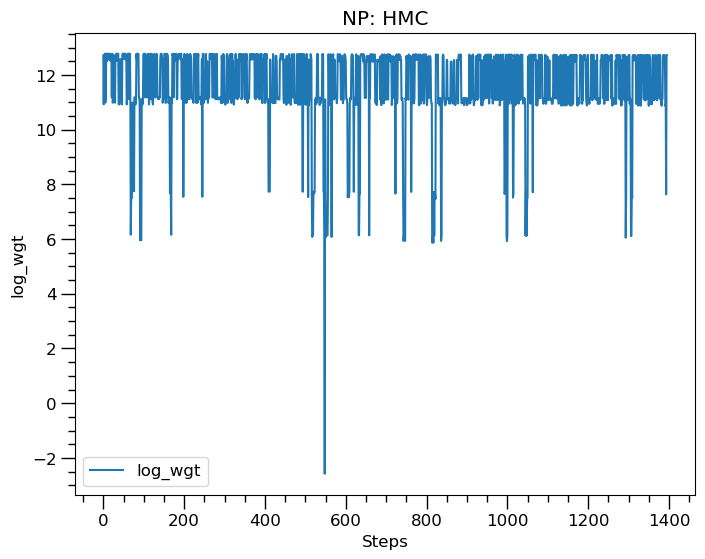

In [5]:
data = h5py.File('hmc2/np_0_out', 'r')['markov_chain_0']['data']
log_wgt = np.array(data['log_wgt'])
#prob_gw17 = np.array(data['prob_gw17'])
#prob_gw19 = np.array(data['prob_gw19'])
#log_wgt_pop = np.array(data['log_wgt_pop'])
#log_wgt_6304 = np.array(data['log_wgt_6304'])
#log_wgt_6397 = np.array(data['log_wgt_6397'])
#log_wgt_M13 = np.array(data['log_wgt_M13'])
#log_wgt_M28 = np.array(data['log_wgt_M28'])
#log_wgt_M30 = np.array(data['log_wgt_M30'])
#log_wgt_wCen = np.array(data['log_wgt_wCen'])
#log_wgt_X7 = np.array(data['log_wgt_X7'])
#log_wgt_1810b = np.array(data['log_wgt_1810b'])
#log_wgt_1724b = np.array(data['log_wgt_1724b'])
#log_wgt_1702 = np.array(data['log_wgt_1702'])
#log_wgt_0030 = np.array(data['log_wgt_0030'])
#log_wgt_0740 = np.array(data['log_wgt_0740'])

plt.figure(figsize=(8,6))
plt.plot(log_wgt, label='log_wgt')

#plt.plot(log_wgt_pop, label='log_wgt_pop')
#plt.plot(log_wgt_6304, label='log_wgt_6304')
#plt.plot(log_wgt_6397, label='log_wgt_6397')
#plt.plot(log_wgt_M13, label='log_wgt_M13')
#plt.plot(log_wgt_M28, label='log_wgt_M28')
#plt.plot(log_wgt_M30, label='log_wgt_M30')
#plt.plot(log_wgt_wCen, label='log_wgt_wCen')
#plt.plot(log_wgt_X7, label='log_wgt_X7')
#plt.plot(log_wgt_1810b, label='log_wgt_1810b')
#plt.plot(log_wgt_1724b, label='log_wgt_1724b')
#plt.plot(log_wgt_1702, label='log_wgt_1702')
#plt.plot(log_wgt_0030, label='log_wgt_0030')
#plt.plot(log_wgt_0740, label='log_wgt_0740')

plt.xlabel('Steps')
plt.ylabel('log_wgt')
plt.title('NP: HMC')
plt.minorticks_on()
plt.tick_params('both', length=10, width=1, which='major')
plt.tick_params('both', length=5, width=1, which='minor')
plt.legend()
plt.show()
